# LSTM과 FinanceDataReader API를 이용한 주가 예측

참고 : https://teddylee777.github.io/tensorflow/lstm-stock-forecast

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM을 활용한 주가 예측 모델 구축

## 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 (FinanceDataReader)

In [2]:
# FinanceDataReader 설치
# !pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

In [4]:
# 삼성전자(005930) 전체 (1965-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

칼럼 설명
- Open : 시가
- High : 고가
- Low : 저가
- Close : 종가
- Volume : 거래량
- Change : 대비

In [5]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-02-22,83800,84200,82200,82200,25419886,-0.004843
2021-02-23,81200,82900,81100,82000,20587314,-0.002433
2021-02-24,81800,83600,81300,82000,26807651,0.000000
2021-02-25,84000,85400,83000,85300,34155986,0.040244
2021-02-26,82800,83400,82000,82300,22961458,-0.035170


2017을 넣어주면, 해당 시점 이후의 주식 데이터를 가져옴

In [6]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL', '2017')
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


자세한 내용 : https://github.com/FinanceData/FinanceDataReader 

## 주가 데이터 가져오기

In [7]:
# 삼성전자 주식코드 : 005930
STOCK_CODE = '005930'

In [8]:
stock = fdr.DataReader(STOCK_CODE)

In [9]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-03-12,926,969,926,955,60080,NaN
1997-03-13,960,960,924,934,98465,-0.021990
1997-03-14,942,942,916,920,65100,-0.014989
1997-03-15,919,942,919,943,35040,0.025000
1997-03-17,971,978,951,978,64070,0.037116


In [10]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-02-22,83800,84200,82200,82200,25419886,-0.004843
2021-02-23,81200,82900,81100,82000,20587314,-0.002433
2021-02-24,81800,83600,81300,82000,26807651,0.000000
2021-02-25,84000,85400,83000,85300,34155986,0.040244
2021-02-26,82800,83400,82000,82300,22961458,-0.035170


In [11]:
stock.index

DatetimeIndex(['1997-03-12', '1997-03-13', '1997-03-14', '1997-03-15',
               '1997-03-17', '1997-03-18', '1997-03-19', '1997-03-20',
               '1997-03-21', '1997-03-22',
               ...
               '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

위와 같이 DatetimeIndex로 정의되어 있다면, 연도/월/일을 쪼갤 수 있으며, **월별, 연도별 피벗데이터**를 만들 때 유용하게 활용 가능

In [12]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [13]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-03-12,926,969,926,955,60080,NaN,1997,3,12
1997-03-13,960,960,924,934,98465,-0.021990,1997,3,13
1997-03-14,942,942,916,920,65100,-0.014989,1997,3,14
1997-03-15,919,942,919,943,35040,0.025000,1997,3,15
1997-03-17,971,978,951,978,64070,0.037116,1997,3,17


## 시각화

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


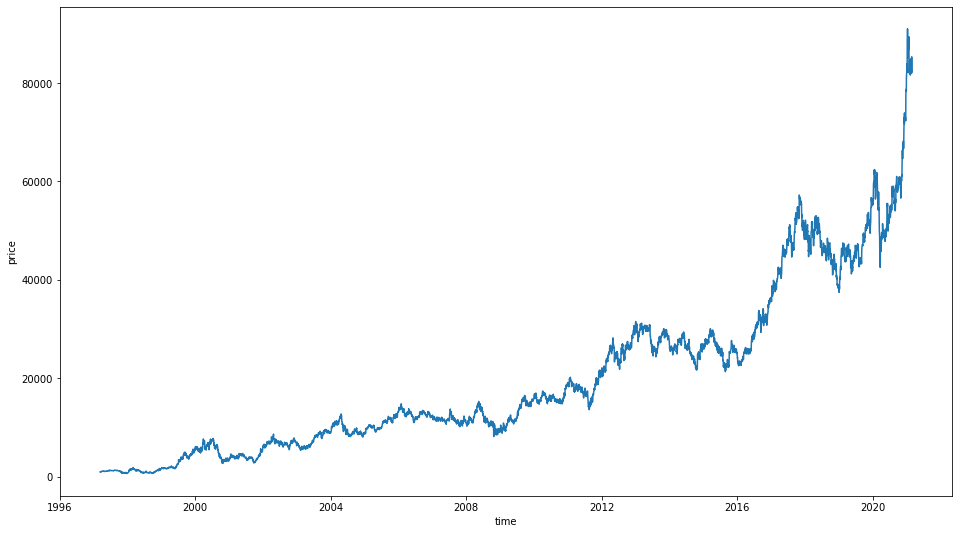

In [14]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


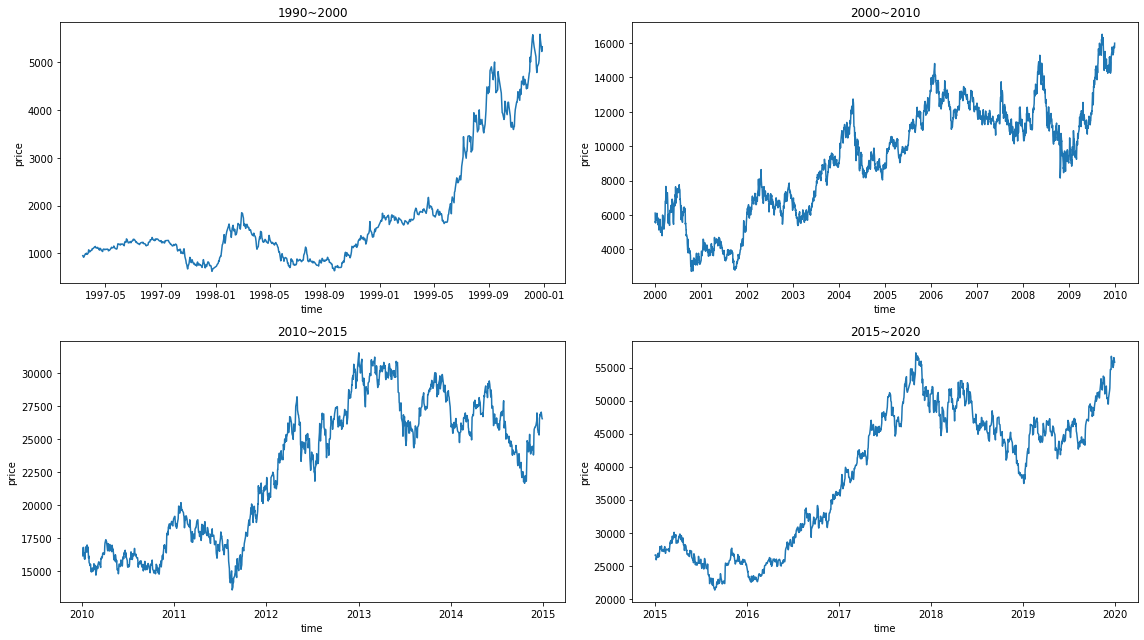

In [15]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
  ax = axes[i//2, i%2]
  df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
  sns.lineplot(y=df['Close'], x=df.index, ax=ax)
  ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
  ax.set_xlabel('time')
  ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column 정의
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 colums
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[1.02547065e-02, 1.00103306e-02, 1.03463687e-02, 3.62940259e-03,
        6.65292253e-04],
       [1.06312292e-02, 9.91735537e-03, 1.03240223e-02, 3.39703230e-03,
        1.09034623e-03],
       [1.04318937e-02, 9.73140496e-03, 1.02346369e-02, 3.24211877e-03,
        7.20880920e-04],
       ...,
       [9.05869324e-01, 8.63636364e-01, 9.08379888e-01, 9.00412734e-01,
        2.96852905e-01],
       [9.30232558e-01, 8.82231405e-01, 9.27374302e-01, 9.36928065e-01,
        3.78224249e-01],
       [9.16943522e-01, 8.61570248e-01, 9.16201117e-01, 9.03732309e-01,
        2.54262319e-01]])

In [17]:
# 스케일이 완료된 column으로 새로운 데이터프레임 생성
# 시간 순 정렬
df = pd.DataFrame(scaled, columns=scale_cols)

## train/test 분할

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [20]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [21]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [22]:
x_train

,Open,High,Low,Volume
0,0.010255,0.010010,0.010346,0.000665
1,0.010631,0.009917,0.010324,0.001090
2,0.010432,0.009731,0.010235,0.000721
3,0.010177,0.009731,0.010268,0.000388
4,0.010753,0.010103,0.010626,0.000709
...,...,...,...,...
4795,0.287708,0.270455,0.284022,0.003003
4796,0.283278,0.269628,0.285810,0.002082
4797,0.287708,0.268388,0.281564,0.002617
4798,0.281063,0.266736,0.283352,0.002040


## TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [23]:
import tensorflow as tf

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size+1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size+1))
  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.map(lambda w: (w[:-1], w[-1]))
  return ds.batch(batch_size).prefetch(1)

In [25]:
# Hyperparameter 정의
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [26]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [27]:
# 데이터셋 구성 확인
# X : (batch_size, window_size, feature)
# Y : (batch_size, feature)
for data in train_data.take(1):
  print(f'데이터셋(X) 구성(batch_size, window_size, feature 갯수) : {data[0].shape}')
  print(f'데이터셋(Y) 구성(batch_size, feature 갯수) : {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature 갯수) : (32, 20, 1)
데이터셋(Y) 구성(batch_size, feature 갯수) : (32, 1)


## 모델

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
      # 1차원 feature map 생성
      Conv1D(filters=32, kernel_size=5,
             padding="causal",
             activation="relu",
             input_shape=[WINDOW_SIZE, 1]),
      # LSTM
      LSTM(16, activation='tanh'),
      Dense(16, activation="relu"),
      Dense(1),
])

In [29]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용함
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [30]:
# earlystopping은 10번 epoch 동안 val_loss 개선이 없다면 학습을 멈춤
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

# val_loss 기준 체크 포인터 생성
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [31]:
history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 5s 18ms/step - loss: 1.2573e-04 - mse: 2.5147e-04 - val_loss: 0.0017 - val_mse: 0.0033

Epoch 00001: val_loss improved from inf to 0.00166, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 2s 12ms/step - loss: 9.2328e-06 - mse: 1.8466e-05 - val_loss: 0.0016 - val_mse: 0.0031

Epoch 00002: val_loss improved from 0.00166 to 0.00157, saving model to tmp/ckeckpointer.ckpt
Epoch 3/50
150/150 [==============================] - 2s 12ms/step - loss: 8.8161e-06 - mse: 1.7632e-05 - val_loss: 0.0016 - val_mse: 0.0033

Epoch 00003: val_loss did not improve from 0.00157
Epoch 4/50
150/150 [==============================] - 2s 11ms/step - loss: 9.2060e-06 - mse: 1.8412e-05 - val_loss: 0.0017 - val_mse: 0.0033

Epoch 00004: val_loss did not improve from 0.00157
Epoch 5/50
150/150 [==============================] - 2s 12ms/step - loss: 8.1006e-06 - mse: 1.6201e-05 - val_loss: 0.0019 - val_mse: 0.0037

Epoc

In [32]:
# ModelCheckpoint 로드
model.load_weights(filename)

In [33]:
# test_data를 활용하여 예측 진행
pred = model.predict(test_data)

In [34]:
pred.shape

(1180, 1)

## 예측 데이터 시각화

- y_test 데이터에 [20:]으로 슬라이싱한 이유
예측 데이터에서 20일치의 데이터로 21일치를 예측해야 하기 때문에 test_data로 예측시 앞의 20일은 예측하지 않음

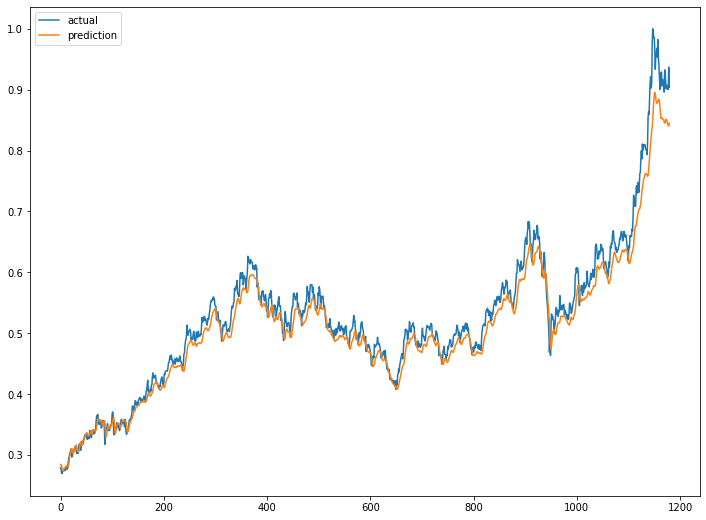

In [35]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()